# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.753910e+01     1.316332e+01
 * time: 0.0014810562133789062
     1     3.050258e+01     7.166190e+00
 * time: 0.006757020950317383
     2     2.541695e+01     4.625541e+00
 * time: 0.012753009796142578
     3     2.182599e+01     2.108570e+00
 * time: 0.017781972885131836
     4     2.061012e+01     1.739478e+00
 * time: 0.022717952728271484
     5     2.042749e+01     2.410233e+00
 * time: 0.026700973510742188
     6     2.036503e+01     2.028845e+00
 * time: 0.030636072158813477
     7     1.956889e+01     1.693081e+00
 * time: 0.06548905372619629
     8     1.874402e+01     2.185180e+00
 * time: 0.06911706924438477
     9     1.840378e+01     2.265586e+00
 * time: 0.07268905639648438
    10     1.813147e+01     1.584143e+00
 * time: 0.0762641429901123
    11     1.775980e+01     1.197140e+00
 * time: 0.07978701591491699
    12     1.748675e+01     8.807970e-01
 * time: 0.08336615562438965
    13     1.731871e+01     6.090101e-01
 

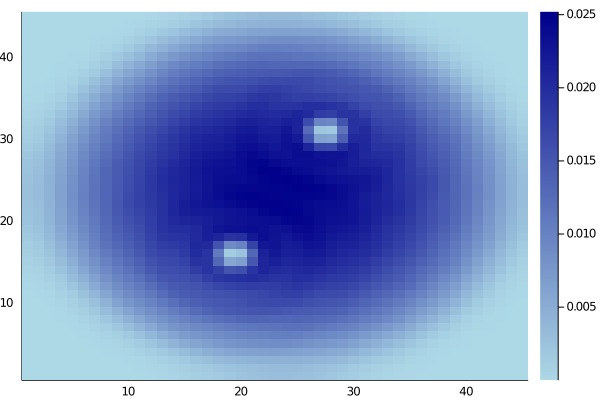

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)